# Let's make histograms from Equivalent Bins

In [1]:
base_directory = '/home/shoaib/ZTFDataChallenge/'

import sys
sys.path.insert(0, base_directory + 'dmdt_Analysis/')
from dmdt_functions import *

In [ ]:
import numpy as np
import pandas as pd
from os import listdir

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=10)

from tqdm.auto import tqdm
tqdm.pandas(desc="Lightcurves Processed")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
qso_types = ['Q', 'QR', 'QX']

In [4]:
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl').dropna()
# lightcurves_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)]
### Sampling to save disk space
# fraction = 0.1
# all_object_names = lightcurves_by_name['name'].unique()
# sampled_object_names = np.random.choice(all_object_names, size=int(len(all_object_names) * fraction), replace=False)
# lightcurves_by_name = lightcurves_by_name[lightcurves_by_name['name'].isin(sampled_object_names)]

lightcurves_by_oid = pd.read_pickle(base_directory + 'lightcurves_by_oid_1day_binned.pkl').dropna()
# lightcurves_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)]
### Sampling to save disk space
# fraction = 0.1
# all_oids = lightcurves_by_oid['oid_alerce'].unique()
# sampled_oids = np.random.choice(all_oids, size=int(len(all_oids) * fraction), replace=False)
# lightcurves_by_oid = lightcurves_by_oid[lightcurves_by_oid['oid_alerce'].isin(sampled_oids)]

In [11]:
lightcurves_by_oid['type'].value_counts()

type
Q     72116
A     12769
QX     8973
AX     5151
QR     4649
      ...  
NX        8
K         5
KR        4
KX        4
NR        4
Name: count, Length: 29, dtype: int64

In [5]:
def return_histogram(lightcurve, dm_bins, dt_bins):
    histogram, _, _ = get_dmdt_histogram(lightcurve[:, 1], dm_bins, lightcurve[:, 0], dt_bins)
    return histogram

Loading the bins

In [6]:
### Loading the bins
dm_QSOs_50_equivalent_bins_1day_cadence = np.load(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_Equivalent_Bins/dm_lightcurves_by_name_QSOs_1day_cadence.npy')
dt_QSOs_50_equivalent_bins_1day_cadence = np.load(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_Equivalent_Bins/dt_lightcurves_by_name_QSOs_1day_cadence.npy')

### Loading the bins
dm_QSOs_50_equivalent_bins_original_cadence = np.load(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_Equivalent_Bins/dm_lightcurves_by_name_QSOs_original_cadence.npy')
dt_QSOs_50_equivalent_bins_original_cadence = np.load(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_Equivalent_Bins/dt_lightcurves_by_name_QSOs_original_cadence.npy')

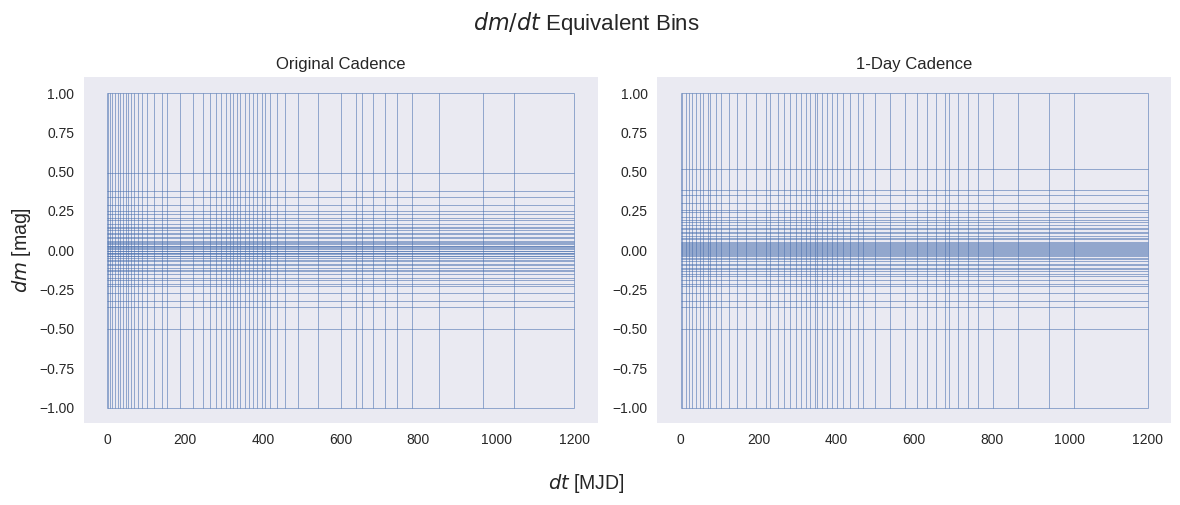

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].hlines(dm_QSOs_50_equivalent_bins_original_cadence, dt_QSOs_50_equivalent_bins_original_cadence.min(), dt_QSOs_50_equivalent_bins_original_cadence.max(), linewidth=0.4)
axs[0].vlines(dt_QSOs_50_equivalent_bins_original_cadence, dm_QSOs_50_equivalent_bins_original_cadence.min(), dm_QSOs_50_equivalent_bins_original_cadence.max(), linewidth=0.4)
axs[0].set_title('Original Cadence')

axs[1].hlines(dm_QSOs_50_equivalent_bins_1day_cadence, dt_QSOs_50_equivalent_bins_1day_cadence.min(), dt_QSOs_50_equivalent_bins_1day_cadence.max(), linewidth=0.4)
axs[1].vlines(dt_QSOs_50_equivalent_bins_1day_cadence, dm_QSOs_50_equivalent_bins_1day_cadence.min(), dm_QSOs_50_equivalent_bins_1day_cadence.max(), linewidth=0.4)
axs[1].set_title('1-Day Cadence')

fig.suptitle('$dm/dt$ Equivalent Bins', size=16)
fig.supxlabel('$dt$ [MJD]', size=14)
fig.supylabel('$dm$ [mag]', size=14)

plt.tight_layout()
plt.show()

## By Name

In [8]:
lightcurves_by_name['r_histogram_1day_cadence'] = lightcurves_by_name['r_lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                                     dm_QSOs_50_equivalent_bins_1day_cadence,
                                                                                                                                                     dt_QSOs_50_equivalent_bins_1day_cadence))
lightcurves_by_name['g_histogram_1day_cadence'] = lightcurves_by_name['g_lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                                     dm_QSOs_50_equivalent_bins_1day_cadence,
                                                                                                                                                     dt_QSOs_50_equivalent_bins_1day_cadence))

lightcurves_by_name['r_histogram_original_cadence'] = lightcurves_by_name['r_lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                             dm_QSOs_50_equivalent_bins_original_cadence,
                                                                                                                                             dt_QSOs_50_equivalent_bins_original_cadence))
lightcurves_by_name['g_histogram_original_cadence'] = lightcurves_by_name['g_lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                             dm_QSOs_50_equivalent_bins_original_cadence,
                                                                                                                                             dt_QSOs_50_equivalent_bins_original_cadence))

In [9]:
lightcurves_by_name.to_pickle(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_equivalent_histograms_by_name.pkl')

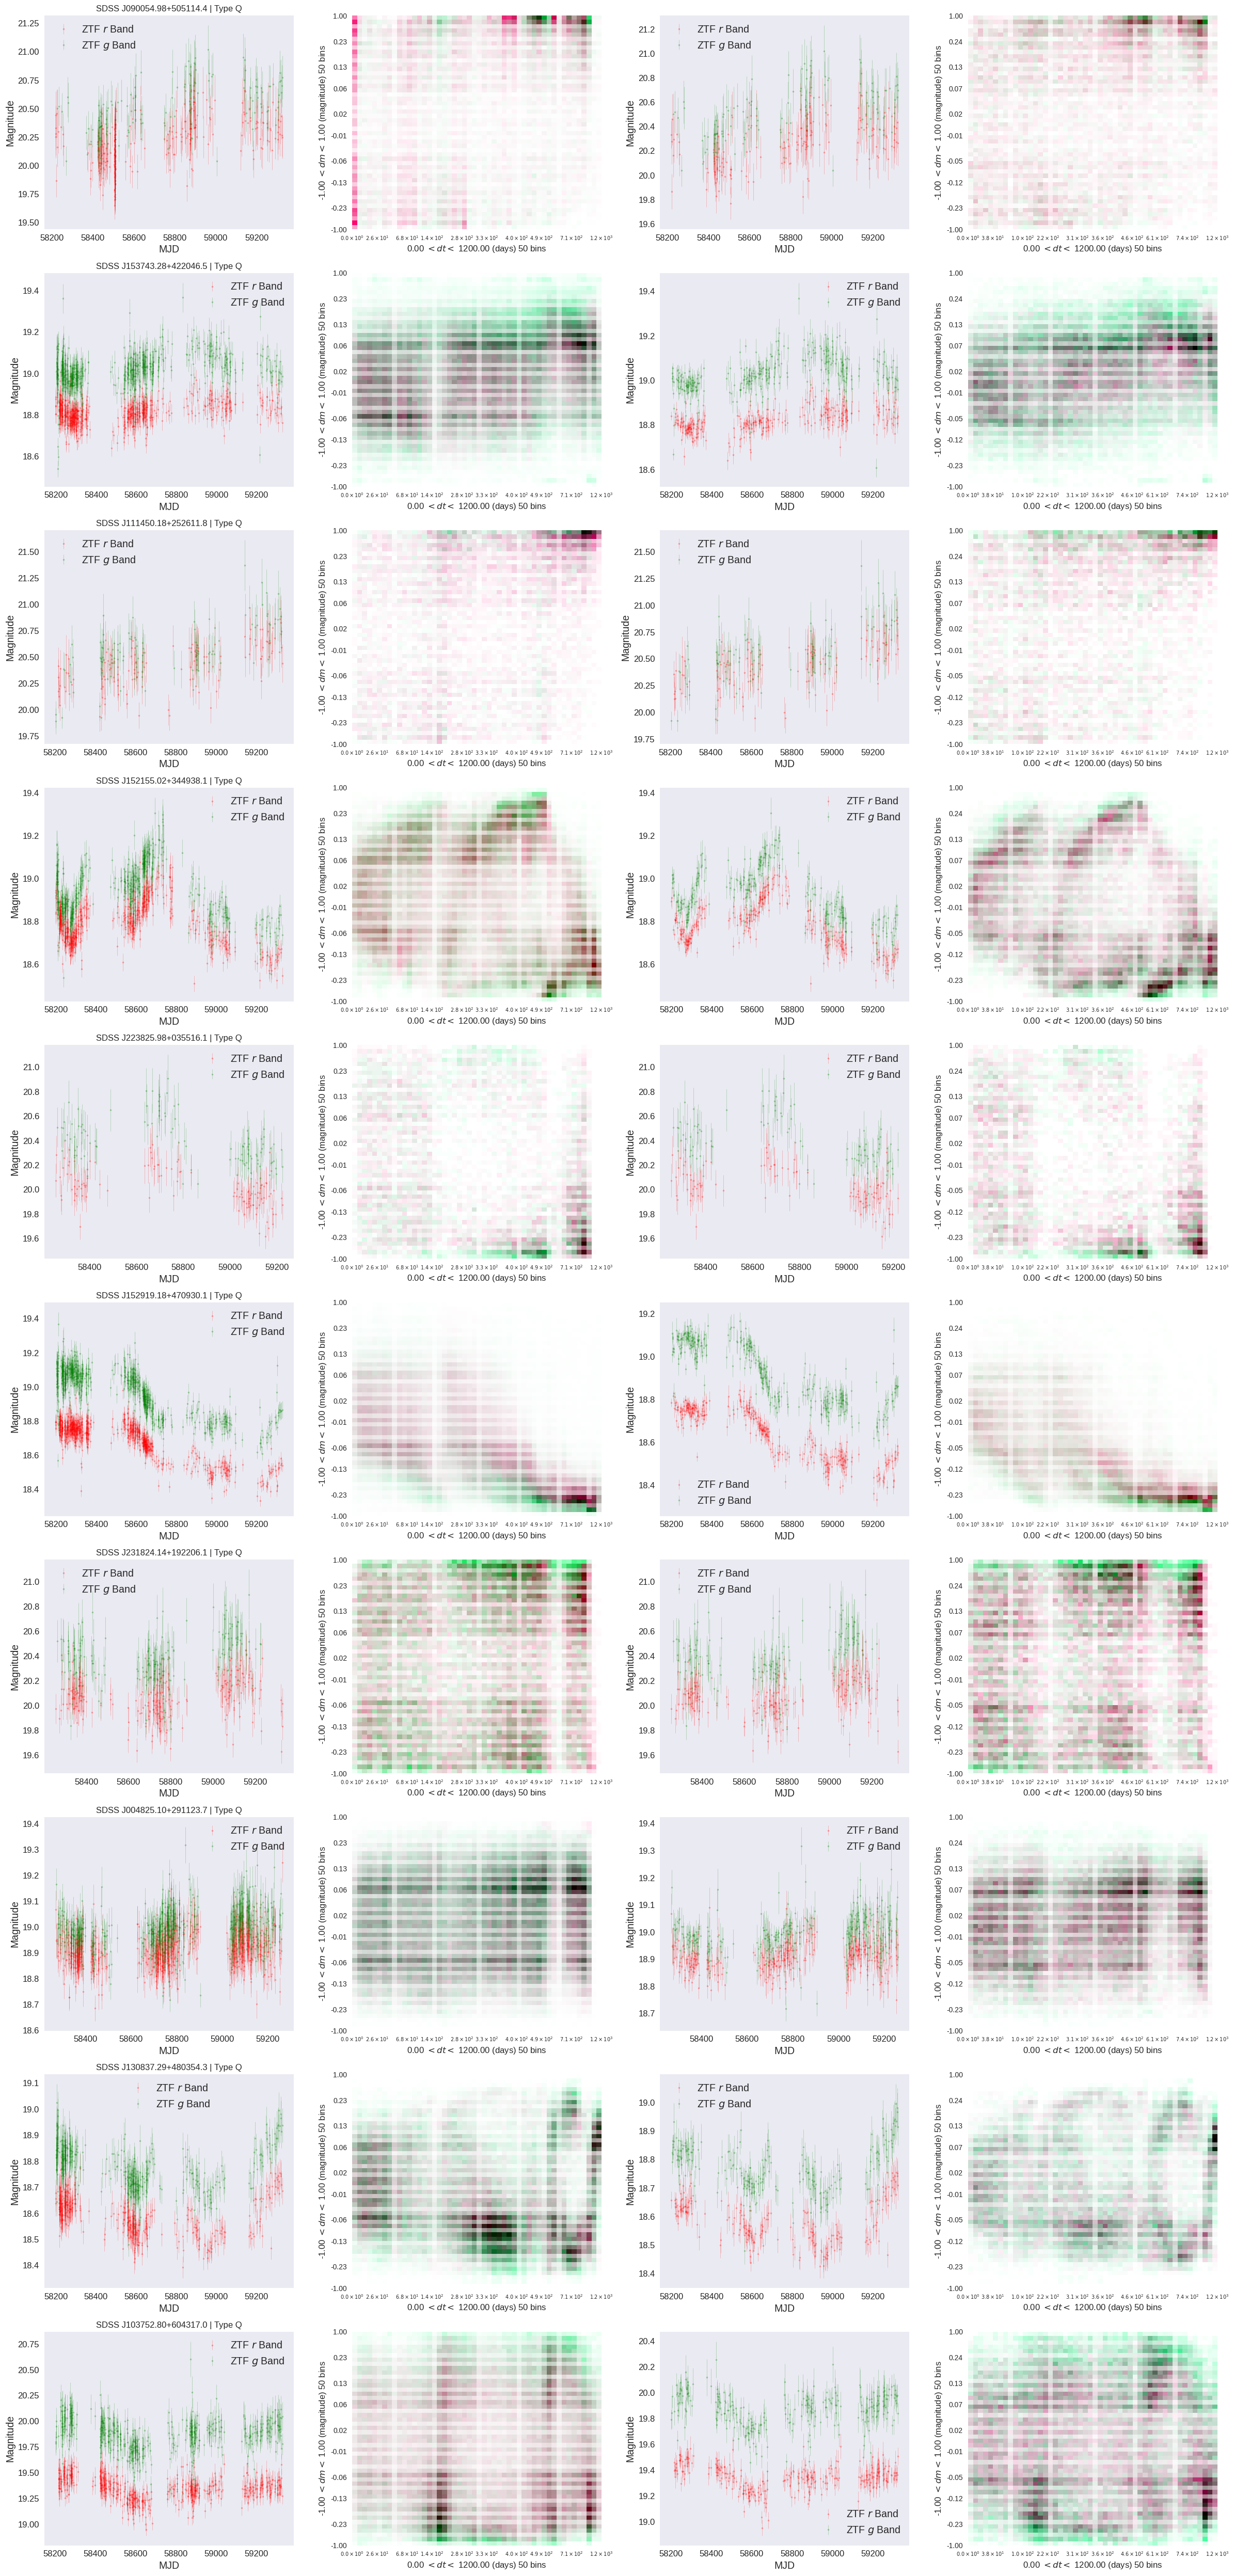

In [10]:
num_examples = 10
sample_df_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)].sample(num_examples)
sample_df_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)].sample(num_examples)

fig, axs = plt.subplots(nrows=num_examples, ncols=4, figsize=(6 * 4, num_examples * 5))

for i, ax_row in enumerate(axs):
    object_name = sample_df_by_name['name'].iloc[i]
    object_type = sample_df_by_name['type'].iloc[i]
    object_lightcurve_r_original = sample_df_by_name['r_lightcurve'].iloc[i]
    object_lightcurve_g_original = sample_df_by_name['g_lightcurve'].iloc[i]
    object_lightcurve_r_1day = sample_df_by_name['r_lightcurve_1day_binned'].iloc[i]
    object_lightcurve_g_1day = sample_df_by_name['g_lightcurve_1day_binned'].iloc[i]
    object_histogram_r_original_cadence = sample_df_by_name['r_histogram_original_cadence'].iloc[i]
    object_histogram_g_original_cadence = sample_df_by_name['g_histogram_original_cadence'].iloc[i]
    object_histogram_r_1day_cadence = sample_df_by_name['r_histogram_1day_cadence'].iloc[i]
    object_histogram_g_1day_cadence = sample_df_by_name['g_histogram_1day_cadence'].iloc[i]
    ax_row[0].set_title(f'{object_name} | Type {object_type}')
    draw_single_axis_both_bands(ax_row[0], object_lightcurve_r_original, object_lightcurve_g_original)
    draw_showcase_histogram(ax_row[1], object_histogram_r_original_cadence, object_histogram_g_original_cadence, dm_QSOs_50_equivalent_bins_original_cadence, dt_QSOs_50_equivalent_bins_original_cadence)
    draw_single_axis_both_bands(ax_row[2], object_lightcurve_r_1day, object_lightcurve_g_1day)
    draw_showcase_histogram(ax_row[3], object_histogram_r_1day_cadence, object_histogram_g_1day_cadence, dm_QSOs_50_equivalent_bins_1day_cadence, dt_QSOs_50_equivalent_bins_1day_cadence)

    plt.tight_layout()

In [ ]:
fig, axs = 

## By OID

In [11]:
lightcurves_by_oid['histogram_1day_cadence'] = lightcurves_by_oid['lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                               dm_QSOs_50_equivalent_bins_1day_cadence,
                                                                                                                                               dt_QSOs_50_equivalent_bins_1day_cadence))

lightcurves_by_oid['histogram_original_cadence'] = lightcurves_by_oid['lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve,
                                                                                                                                       dm_QSOs_50_equivalent_bins_original_cadence,
                                                                                                                                       dt_QSOs_50_equivalent_bins_original_cadence))

In [12]:
lightcurves_by_oid.to_pickle(base_directory + 'dmdt_Analysis/Equivalent_Bins/50x50_equivalent_histograms_by_oid.pkl')

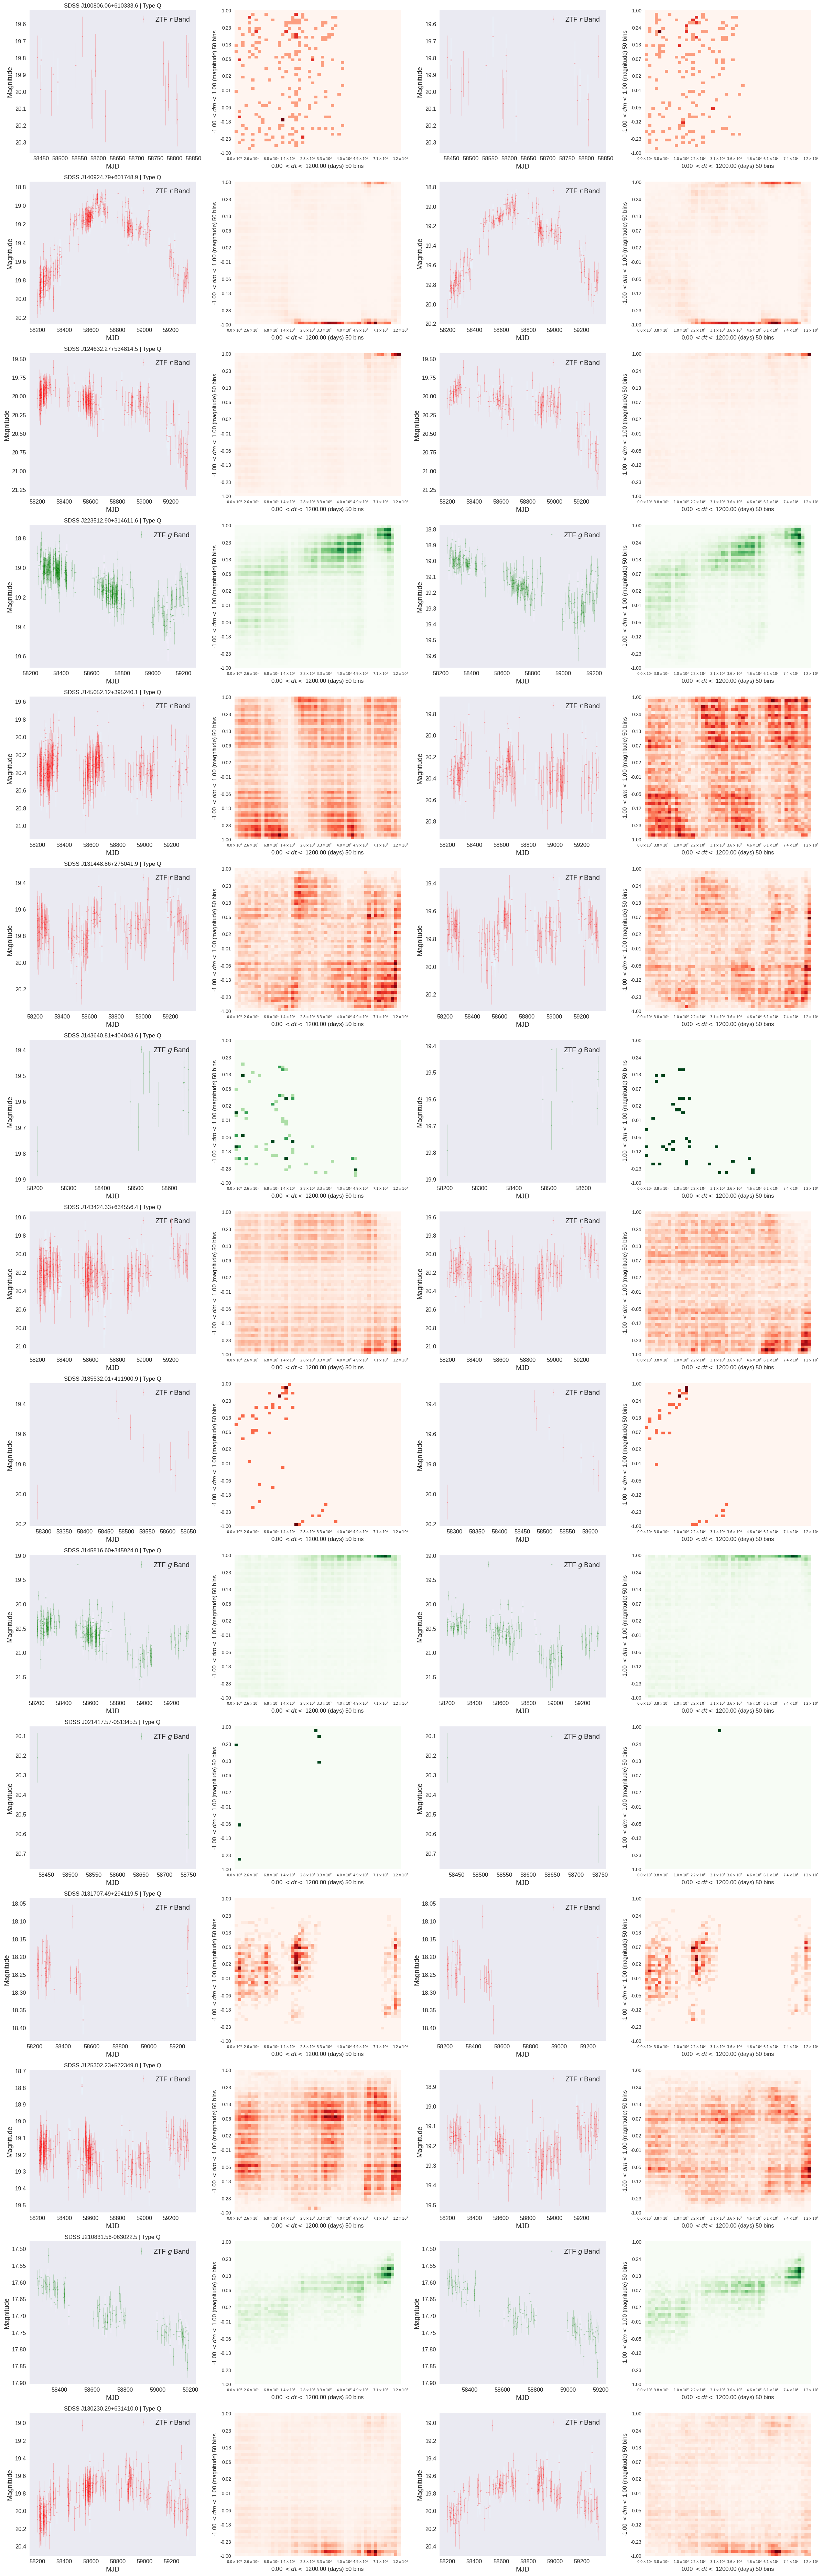

In [13]:
num_examples = 15
sample_df_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)].sample(num_examples)
sample_df_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)].sample(num_examples)

fig, axs = plt.subplots(nrows=num_examples, ncols=4, figsize=(6 * 4, num_examples * 5))

for i, ax_row in enumerate(axs):
    oid = sample_df_by_oid['oid_alerce'].iloc[i]
    oid_name = sample_df_by_oid['name'].iloc[i]
    oid_type = sample_df_by_oid['type'].iloc[i]
    oid_band = sample_df_by_oid['band'].iloc[i]
    oid_lightcurve_original = sample_df_by_oid['lightcurve'].iloc[i]
    oid_lightcurve_1day = sample_df_by_oid['lightcurve_1day_binned'].iloc[i]
    oid_histogram_original_cadence = sample_df_by_oid['histogram_original_cadence'].iloc[i]
    oid_histogram_1day_cadence = sample_df_by_oid['histogram_1day_cadence'].iloc[i]
    ax_row[0].set_title(f'{oid_name} | Type {oid_type}')
    draw_single_axis_single_band(ax_row[0], oid_band, oid_lightcurve_original)
    draw_single_channel_dmdt_histogram(ax_row[1], oid_histogram_original_cadence, oid_band, dm_QSOs_50_equivalent_bins_original_cadence, dt_QSOs_50_equivalent_bins_original_cadence)
    draw_single_axis_single_band(ax_row[2], oid_band, oid_lightcurve_1day)
    draw_single_channel_dmdt_histogram(ax_row[3], oid_histogram_1day_cadence, oid_band, dm_QSOs_50_equivalent_bins_1day_cadence, dt_QSOs_50_equivalent_bins_1day_cadence)

    plt.tight_layout()